In [12]:
import tensorflow as tf

In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [14]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=50

In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "project",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2045 files belonging to 7 classes.


In [16]:
class_names = dataset.class_names
class_names

['aphidsfile',
 'grub',
 'mole cricket',
 'rice leaf folder',
 'rice leaf hopper',
 'rice water weevil',
 'yellow stem borer']

In [17]:
len(dataset)


64

In [18]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[2 2 2 2 0 1 4 1 1 1 2 2 2 0 2 2 2 0 1 6 2 2 2 4 2 1 4 4 3 2 3 5]


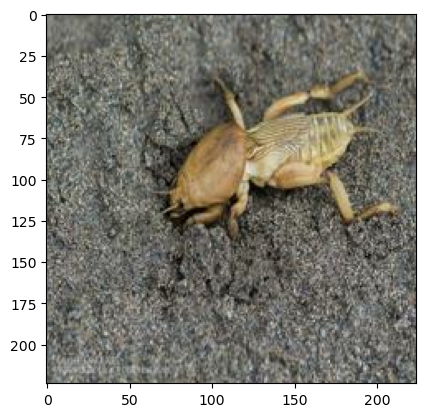

In [19]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [20]:
len(dataset)

64

In [21]:
#80%  ==>training
#20%  ==> 10% validation, 10% test


In [22]:
train_size =0.8
len(dataset)*train_size

51.2

In [23]:
train_ds = dataset.take(54)
len(train_ds)

54

In [24]:
test_ds = dataset.skip(54)
len(test_ds)

10

In [25]:
val_size =0.1
len(dataset)*val_size

6.4

In [26]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [27]:
test_ds= test_ds.skip(6)
len(test_ds)

4

In [28]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size =len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed =33)
    train_size=int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    train_ds= ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds= ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [29]:
train_ds , val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [30]:
len(train_ds)


51

In [31]:
len(val_ds)


6

In [32]:
len(test_ds)

7

In [33]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [34]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [35]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3),
])

In [36]:
input_shape = (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes =7

model = models.Sequential([
    resize_and_rescale,
    #data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu' , input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build( input_shape= input_shape)

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 52, 52, 64)         

In [38]:
 model.compile(
     optimizer='adam',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
     metrics=['accuracy']
     
 )

In [39]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
51/51 [==============================] - 44s 810ms/step - loss: 1.4744 - accuracy: 0.4715 - val_loss: 1.3684 - val_accuracy: 0.5208
Epoch 2/50
51/51 [==============================] - 39s 770ms/step - loss: 1.1718 - accuracy: 0.6053 - val_loss: 1.1727 - val_accuracy: 0.6250
Epoch 3/50
51/51 [==============================] - 40s 778ms/step - loss: 0.9817 - accuracy: 0.6710 - val_loss: 0.9707 - val_accuracy: 0.6875
Epoch 4/50
51/51 [==============================] - 38s 746ms/step - loss: 0.8427 - accuracy: 0.7145 - val_loss: 0.8731 - val_accuracy: 0.6719
Epoch 5/50
51/51 [==============================] - 38s 748ms/step - loss: 0.7462 - accuracy: 0.7403 - val_loss: 0.8310 - val_accuracy: 0.6667
Epoch 6/50
51/51 [==============================] - 47s 915ms/step - loss: 0.6800 - accuracy: 0.7563 - val_loss: 0.7442 - val_accuracy: 0.7240
Epoch 7/50
51/51 [==============================] - 46s 894ms/step - loss: 0.6452 - accuracy: 0.7661 - val_loss: 0.6923 - val_accuracy: 0.7083

In [40]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 2s 167ms/step - loss: 0.2145 - accuracy: 0.9729


In [41]:
scores

[0.21450383961200714, 0.9728506803512573]

In [57]:
history

In [56]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 51}

In [49]:
history.history.keys()
#history.history['accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [81]:
history.history['accuracy'][:5]

[0.4714548885822296,
 0.6052793264389038,
 0.6709637641906738,
 0.7145488262176514,
 0.7403314709663391]

In [82]:
history.history['loss'][:5]

[1.4743601083755493,
 1.1717915534973145,
 0.9817453622817993,
 0.8426775932312012,
 0.7462263703346252]

In [62]:
type(history.history['loss'])

list

In [63]:
len(history.history['loss'])

50

In [65]:
history.history['loss'][:5]

[1.4743601083755493,
 1.1717915534973145,
 0.9817453622817993,
 0.8426775932312012,
 0.7462263703346252]

In [71]:
history.history['val_accuracy'][:5]

[0.5208333134651184, 0.625, 0.6875, 0.671875, 0.6666666865348816]

In [72]:
val_loss= history.history['val_loss']

In [77]:
acc = history.history['accuracy']

In [74]:
val_acc = history.history['val_accuracy']

In [75]:
loss = history.history['loss']

In [79]:
#acc=histroy.history['accuracy']
#val_acc= history.history['val_accuracy']

#loss = history.history['loss']
#val_loss= history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

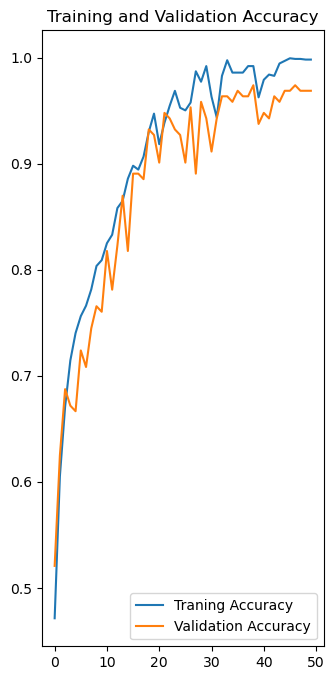

In [80]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Traning Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

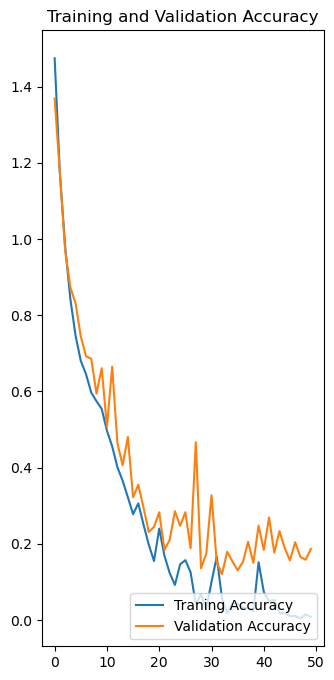

In [88]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Traning Accuracy')
plt.plot(range(EPOCHS),val_loss, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label: mole cricket
1/1 [==============================] - 0s 224ms/step
predicted label: mole cricket


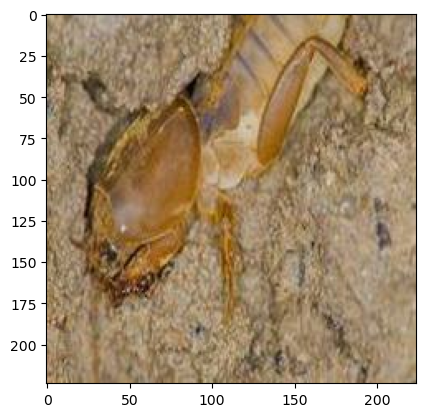

In [94]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [91]:
np.argmax([9.9999964e-01,3.9333537e-07,1.1586251e-18])

0

In [95]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
#create a batch
    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


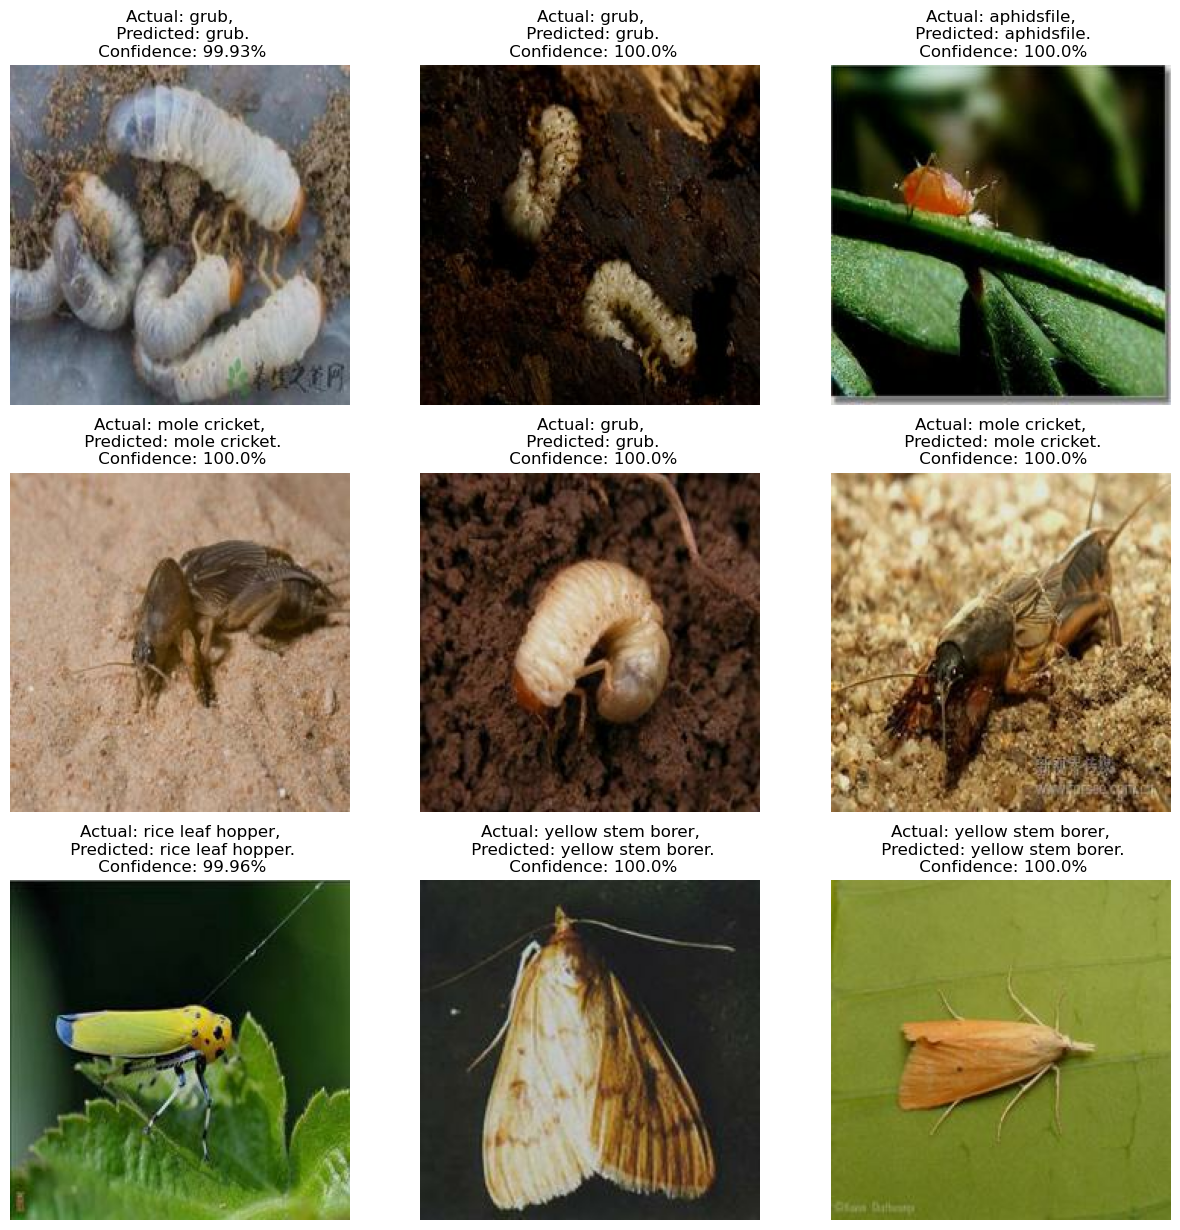

In [99]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [116]:
#import os
#model_version=max([int(i) for i in os.listdir("C:/Users/tejar/insjectsproj/models_saved") + [0]])+1
#model.save("C:/Users/tejar/insjectsproj/models_saved/{model_version}")

In [114]:
model_version=1
model.save("C:/Users/tejar/insjectsproj/models_saved/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/tejar/insjectsproj/models_saved/{model_version}\assets


INFO:tensorflow:Assets written to: C:/Users/tejar/insjectsproj/models_saved/{model_version}\assets
